In [2]:
import  sys
sys.path.insert(0, "C:/projets_python/diabolo")
import etude_variable.test

import etude_variable.lecture_data as ld

import  etude_variable.analyse as ana

import sklearn

from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score

import etude_variable.jouer as jouer

import pandas as pd
import numpy as np
from sklearn.utils import class_weight
import matplotlib
import scipy
from imblearn.over_sampling import     SMOTE
import platform

from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot



from time import time
from operator import itemgetter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import xgboost as xgb


# make sure to use position 1


print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)



Operating system version.... Windows-10-10.0.16299-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0



DF Après LECTURE --------------  d:\diabollo_al_1.csv




Normalisation scaler ....




df gagnant defini....
(0, 'HIPPO')
(1, 'PAR_CARRIERE')
(2, 'PAR_CARRIERE_Q')
(3, 'PAR_CLASSE_AGE')
(4, 'PAR_COTEDER')
(5, 'PAR_ENT_ECART_GAGNANT')
(6, 'PAR_ENT_RAPPORT_GAGNANT_M')
(7, 'PAR_ENT_REU_PLACE')
(8, 'PAR_ENT_REUSSITE_GAGNE')
(9, 'PAR_ENT_VICTOIRE')
(10, 'PAR_GAIN')
(11, 'pAR_JOC_ECART_GAGNANT')
(12, 'PAR_JOC_ECART_PLACE')
(13, 'PAR_JOC_NB_COURSE')
(14, 'PAR_JOC_PLACE_3P')
(15, 'pAR_JOC_RAPPORT_GAGNANT_M')
(16, 'PAR_JOC_REU_PLACE')
(17, 'pAR_JOC_REUSSITE_GAGNE')
(18, 'pAR_JOC_VICTOIRE')
(19, 'PAR_NUM')
(20, 'PAR_PLACE')
(21, 'PAR_PLACE_Q')
(22, 'PAR_REUSSITE_3P')
(23, 'PAR_REUSSITE_GAGNE')
(24, 'PAR_REUSSITE_QUINTE')
(25, 'PAR_RUESSITE_PLACE')
(26, 'autostart')
(27, 'Point')
(28, 'Nb_partant')
(29, 'PAR_PROPRIO')
(30, 'NOM_JOC')
(31, 'NOM_ENTR')
(32, 'CHEVAL')
Features                   :   Index(['HIPPO', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSI

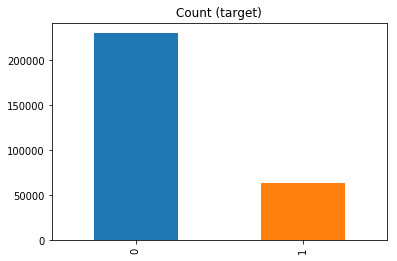

Total number of records : 293781 
Nombre de participations avec SELECTION=0 : 230164
Nombre de participations avec SELECTION=1  : 63617
Pourcentage 0: 78.3454%,  pourcentage 1 : 21.6546%


In [2]:


df_gagnant,  feature_columns, response_column = ld.calul_data_allure(allure_etudier = 1,mode_debug=0)
taille_training = 0.75


In [3]:

train_x, test_x, train_y, test_y = ana.my_split(df=df_gagnant,
                                                                              taille_entrainement=taille_training,
                                                                              feature_columns =feature_columns,
                                                                              response_column =response_column,
                                                                               random_state=42,
                                                                              mode_debug=0)


test_y = test_y['SELECTION'].ravel()
train_y = train_y['SELECTION'].ravel()


---------Training data statistics-----------
Total number of records : 220335 


Total 0 : 172535
Total 1 : 47800
Percent 0 : 78.3058%,  1 is : 21.6942%
---------Testing data statistics-----------
Total number of records : 73446 
Total 0 : 57629
Total 1: 15817
Percent 0 : 78.4645%,  1 : 21.5355%


In [4]:
fig,ax=plt.subplots(7,4,figsize=(25,20))

num=df_gagnant.columns
count=0
for i in range(7):
    for j in range(4):
        ax[i,j].hist(np.array(df_gagnant[num[count]]))
        ax[i,j].set_title(num[count])
        count+=1
plt.subplots_adjust(wspace=0.5, hspace=0.7)




In [5]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade


In [13]:


sm = SMOTE(kind='regular')
# sm = SMOTE(kind='svm')


# sm= RandomOverSampler()
train_x,train_y=sm.fit_sample(train_x,train_y)

train_x=pd.DataFrame(train_x,columns=feature_columns)
train_y=pd.Series(train_y)

print (train_x.shape, train_y.shape, train_y.sum() , test_y.sum())



    


In [14]:
model=XGBClassifier()




In [15]:
model=model.fit(X=train_x,y=train_y,verbose=True)







EVAL SET ....


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy is:  0.7723225226697166
Evaluation TEST-----------------------------------------------------------------------



 roc_auc_score :   0.6690026873668842


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[147094  25441]
 [ 32264 140271]]


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[49013  8616]
 [ 8106  7711]]
Classification Correcte des données de test : 56724/73446    77.232%



Score  TEST  :   77.232  ************************


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


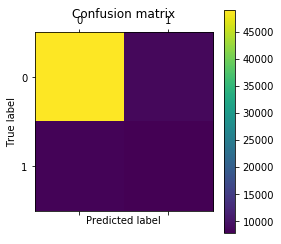

In [16]:
ana.afficheEvalSet(mybest_model=model,set_train=train_x,set_train_cible=train_y,
                                                                     set_test=test_x, set_test_cible=test_y,mode_debug=1)



                       
                
                
                


 


In [10]:
# NAIVE RANDOM OVER-SAMPLING
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
X_resampled=pd.DataFrame(X_resampled)
y_resampled=pd.Series(y_resampled)


X_resampled_test, y_resampled_test = ros.fit_sample(X_test, y_test)



from collections import Counter
print(sorted(Counter(y_resampled).items()))

clf=model.fit(X_resampled, y_resampled.ravel())


y_pred = model.predict(X_resampled_test)









NameError: name 'X_train' is not defined